## Preprocessing

Imporing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
test_fe = pd.read_csv("test_image_features.csv")
train_fe = pd.read_csv("train_image_features.csv")

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
train.head()

id        date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  9117000170  2015-05-05  268643         4       2.25         1810      9240   
1  6700390210  2014-07-08  245000         3       2.50         1600      2788   
2  7212660540  2015-01-15  200000         4       2.50         1720      8638   
3  8562780200  2015-04-27  352499         2       2.25         1240       705   
4  7760400350  2014-12-05  232000         3       2.00         1280     13356   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     2.0           0     0          3      7        1810              0   
1     2.0           0     0          4      7        1600              0   
2     2.0           0     0          3      8        1720              0   
3     2.0           0     0          3      7        1150             90   
4     1.0           0     0          3      7        1280              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1961             0    98055  47.4362 -122.187           1660   
1      1992             0    98031  47.4034 -122.187           1720   
2      1994             0    98003  47.2704 -122.313           1870   
3      2009             0    98027  47.5321 -122.073           1240   
4      1994             0    98042  47.3715 -122.074           1590   

   sqft_lot15  times_priced  
0        9240             0  
1        3605             0  
2        7455             0  
3         750             0  
4        8071             0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

No Null Values Found

In [ ]:
train.describe()

id         price     bedrooms     bathrooms   sqft_living  \
count  1.620900e+04  1.620900e+04  16209.00000  16209.000000  16209.000000   
mean   4.575771e+09  5.374703e+05      3.36782      2.113054   2073.274601   
std    2.874661e+09  3.603036e+05      0.93327      0.765242    907.009491   
min    1.000102e+06  7.500000e+04      0.00000      0.000000    290.000000   
25%    2.123049e+09  3.200000e+05      3.00000      1.500000   1430.000000   
50%    3.904950e+09  4.500000e+05      3.00000      2.250000   1910.000000   
75%    7.304301e+09  6.400000e+05      4.00000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.00000      8.000000  12050.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.620900e+04  16209.000000  16209.000000  16209.000000  16209.000000   
mean   1.486767e+04      1.498828      0.006971      0.234253      3.407860   
std    3.882570e+04      0.543032      0.083206      0.763152      0.651553   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.004000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.599000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.063100e+04      2.000000      0.000000      0.000000      4.000000   
max    1.164794e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  16209.000000  16209.000000   16209.000000  16209.000000  16209.000000   
mean       7.652971   1784.754396     288.520205   1971.152755     82.738108   
std        1.171050    821.820844     438.598910     29.372698    397.861148   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1952.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2200.000000     560.000000   1997.000000      0.000000   
max       13.000000   8860.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  \
count  16209.000000  16209.000000  16209.000000   16209.000000   16209.000000   
mean   98077.974767     47.560707   -122.214003    1983.152261   12735.572707   
std       53.355282      0.138340      0.140093     681.905161   26933.162012   
min    98001.000000     47.159300   -122.519000     399.000000     651.000000   
25%    98033.000000     47.472500   -122.328000    1480.000000    5098.000000   
50%    98065.000000     47.572400   -122.230000    1840.000000    7620.000000   
75%    98117.000000     47.678200   -122.125000    2360.000000   10053.000000   
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000   

       times_priced  
count  16209.000000  
mean       0.018323  
std        0.173795  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        2.000000

In [8]:
test.head()

id        date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2591820310  2014-10-06         4       2.25         2070      8893     2.0   
1  7974200820  2014-08-21         5       3.00         2900      6730     1.0   
2  7701450110  2014-08-15         4       2.50         3770     10893     2.0   
3  9522300010  2015-03-31         3       3.50         4560     14608     2.0   
4  9510861140  2014-07-14         3       2.50         2550      5376     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          4      8        2070              0      1986   
1           0     0          5      8        1830           1070      1977   
2           0     2          3     11        3770              0      1997   
3           0     2          3     12        4560              0      1990   
4           0     0          3      9        2550              0      2004   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0             0    98058  47.4388 -122.162           2390        7700   
1             0    98115  47.6784 -122.285           2370        6283   
2             0    98006  47.5646 -122.129           3710        9685   
3             0    98034  47.6995 -122.228           4050       14226   
4             0    98052  47.6647 -122.083           2250        4050   

   times_priced  
0             0  
1             0  
2             0  
3             0  
4             0

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5404 entries, 0 to 5403
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5404 non-null   int64  
 1   date           5404 non-null   object 
 2   bedrooms       5404 non-null   int64  
 3   bathrooms      5404 non-null   float64
 4   sqft_living    5404 non-null   int64  
 5   sqft_lot       5404 non-null   int64  
 6   floors         5404 non-null   float64
 7   waterfront     5404 non-null   int64  
 8   view           5404 non-null   int64  
 9   condition      5404 non-null   int64  
 10  grade          5404 non-null   int64  
 11  sqft_above     5404 non-null   int64  
 12  sqft_basement  5404 non-null   int64  
 13  yr_built       5404 non-null   int64  
 14  yr_renovated   5404 non-null   int64  
 15  zipcode        5404 non-null   int64  
 16  lat            5404 non-null   float64
 17  long           5404 non-null   float64
 18  sqft_liv

No Missing Values Found

##### Converting the Column "Date" into datetime format

In [10]:
train["date"] = pd.to_datetime(train["date"], errors="coerce")
test["date"]  = pd.to_datetime(test["date"], errors="coerce")

##### Duplicated IDs
There were duplicated ids in both test and train dataframes but different dates. So both the rows were assigned the same image to avoid complexity and save computation.

In [12]:
print(train["id"].duplicated().sum())
print(test["id"].duplicated().sum())

99
8


To account for this we introduce a new variable called "times_priced" which takes into account how many times the house has been priced and which time this particular belongs to.

In [ ]:
train = train.sort_values(["id", "date"])

# assign sequence within each id
train["times_priced"] = train.groupby("id").cumcount() + 1

# convert single occurrences → 0
counts = train["id"].value_counts()
train.loc[train["id"].map(counts) == 1, "times_priced"] = 0

In [ ]:
test = test.sort_values(["id", "date"])

test["times_priced"] = test.groupby("id").cumcount() + 1

counts_test = test["id"].value_counts()
test.loc[test["id"].map(counts_test) == 1, "times_priced"] = 0

##### Correlation Plot

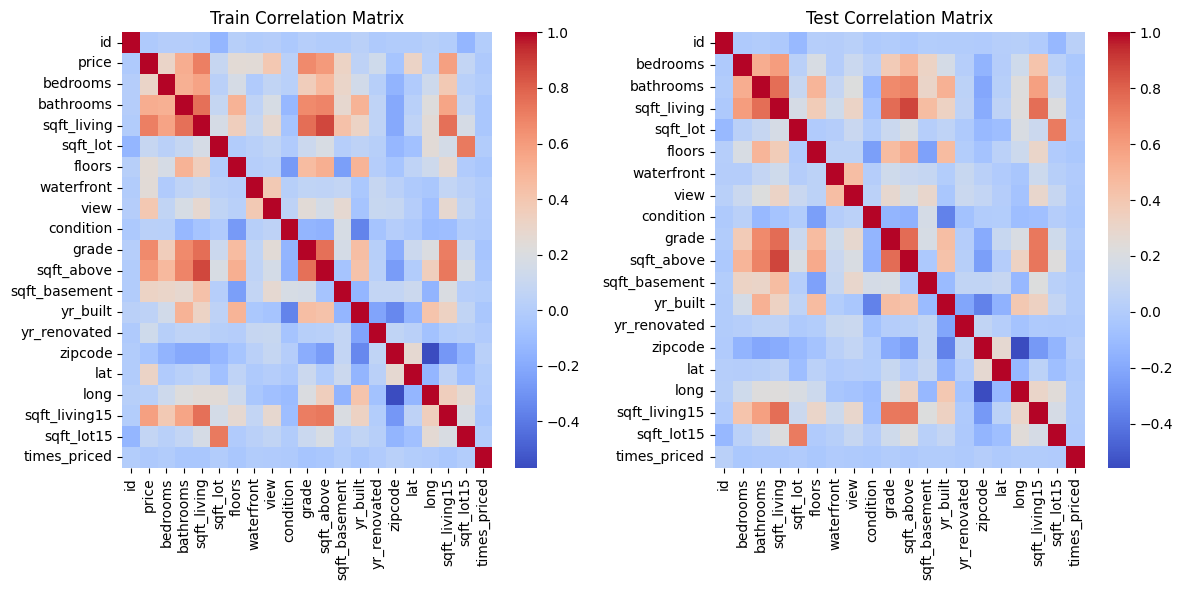

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# numeric-only correlations
train_corr = train.select_dtypes(include=[np.number]).corr()
test_corr  = test.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12,6))

# ---- Train ----
plt.subplot(1,2,1)
sns.heatmap(train_corr, cmap="coolwarm", annot=False)
plt.title("Train Correlation Matrix")

# ---- Test ----
plt.subplot(1,2,2)
sns.heatmap(test_corr, cmap="coolwarm", annot=False)
plt.title("Test Correlation Matrix")

plt.tight_layout()
plt.show()


- `sqft_living` and `sqft_above` show the strongest positive correlation with price, meaning larger interior space increases house value.
- Quality-related features like `grade` and `condition` are also positively correlated with price.
- Lot-based variables (`sqft_lot`, `sqft_lot15`) have weak correlation with price, suggesting land size matters less than living space.
- Latitude shows some correlation with price, likely reflecting more desirable neighborhoods in certain locations.
- Several area features (`sqft_living`, `sqft_above`, `sqft_living15`) are highly correlated with each other, indicating redundancy.
- The correlation structure in train and test sets looks very similar, implying no major distribution shift.
- The `id` column is essentially uncorrelated with all variables, confirming it behaves purely as an identifier.

##### Pair Plot for Relevant Columns

<Figure size 1000x1000 with 0 Axes>

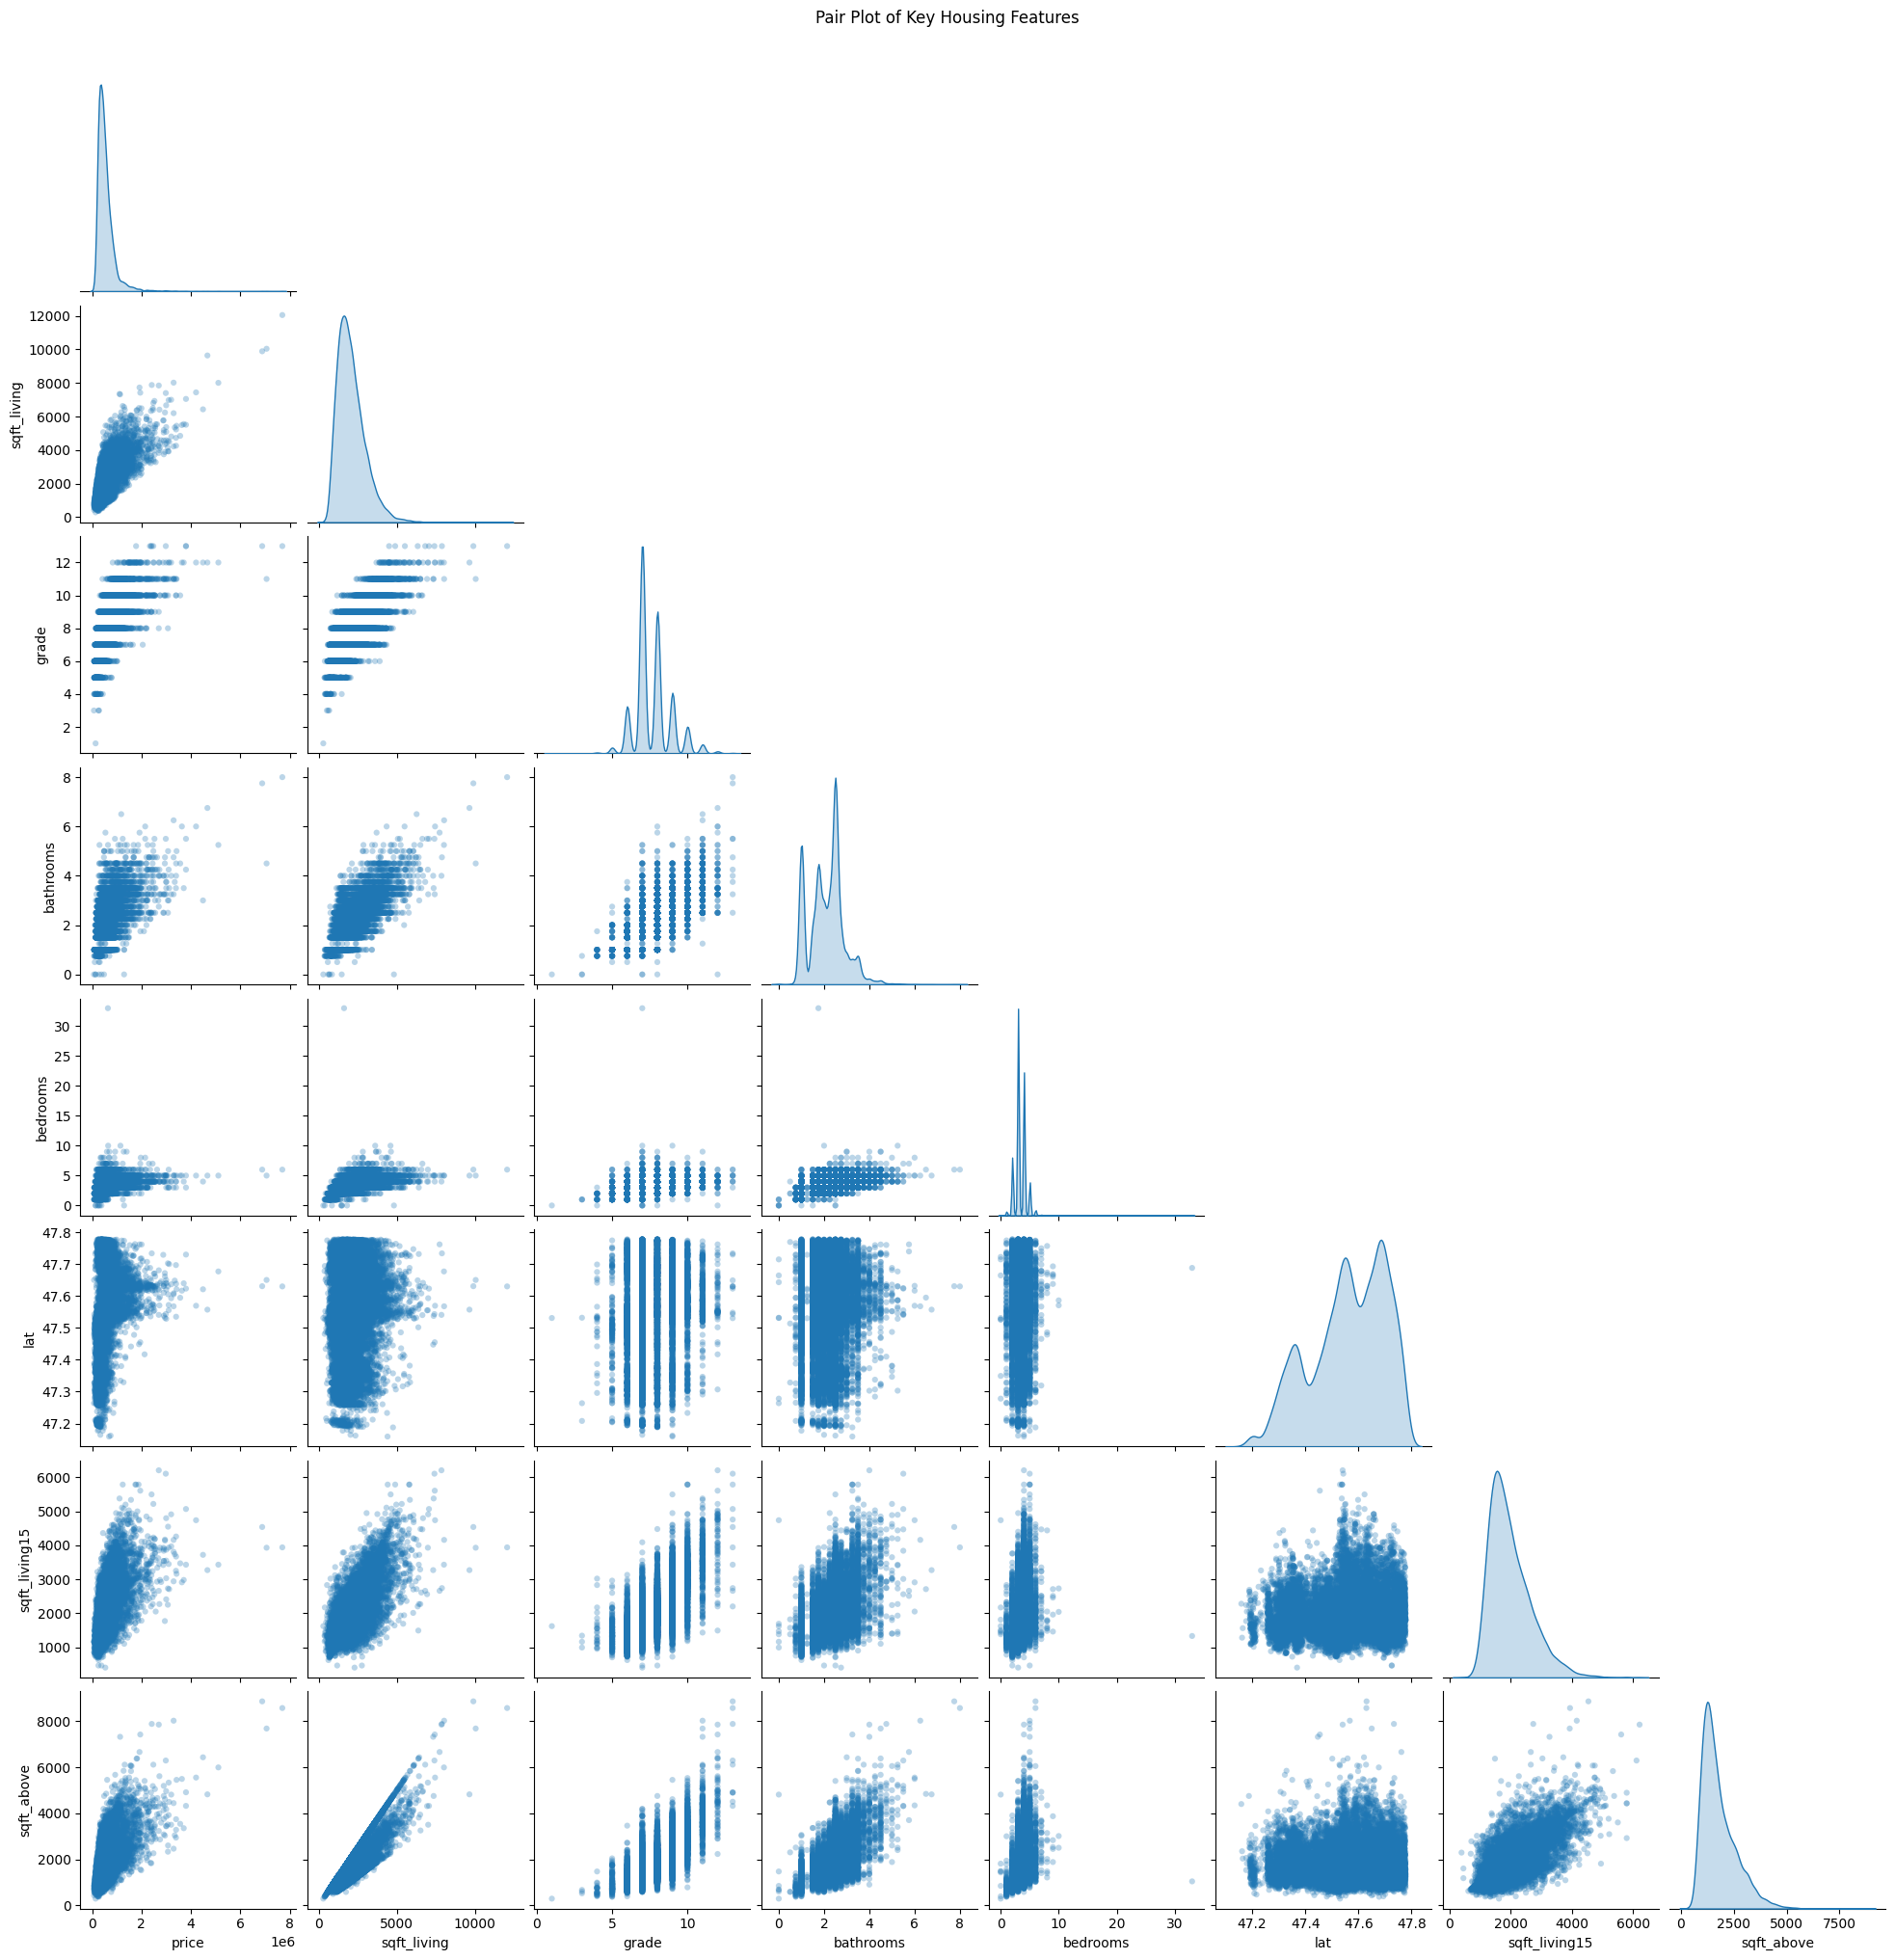

In [17]:
relevant_features = [
    "price",
    "sqft_living",
    "grade",
    "bathrooms",
    "bedrooms",
    "lat",
    "sqft_living15",
    "sqft_above"
]

pair_df = train[relevant_features].dropna()

plt.figure(figsize=(10, 10))
sns.pairplot(pair_df, diag_kind="kde", corner=True,
             plot_kws={"alpha":0.3, "s":20, "edgecolor":"none"})
plt.suptitle("Pair Plot of Key Housing Features", y=1.02)
plt.show()

In [29]:
corr_with_price = train.corr(numeric_only=True)["price"].sort_values(ascending=False)
corr_with_price.head(10)

price            1.000000
sqft_living      0.700933
grade            0.664266
sqft_above       0.602648
sqft_living15    0.581781
bathrooms        0.525487
view             0.390534
sqft_basement    0.320301
lat              0.310008
bedrooms         0.304454
Name: price, dtype: float64

- Price increases clearly with `sqft_living`, showing interior living area is the strongest driver of value.
- Higher `grade` homes consistently appear at higher price ranges, confirming quality ratings strongly affect pricing.
- Bathrooms have a positive relationship with price, but the effect tapers off after ~3–4 bathrooms (diminishing returns).
- Bedrooms show a weaker relationship with price, suggesting raw bedroom count is less important than overall space and quality.
- Latitude shows distinct clusters, indicating neighborhoods at certain latitudes tend to have systematically higher prices.
- `sqft_above` correlates strongly with `sqft_living`, meaning they capture very similar information.
- The distributions reveal strong right-skew in price and square footage, suggesting log-transforming target and certain features is appropriate.

##### Price Histogram (Log- Transformation)

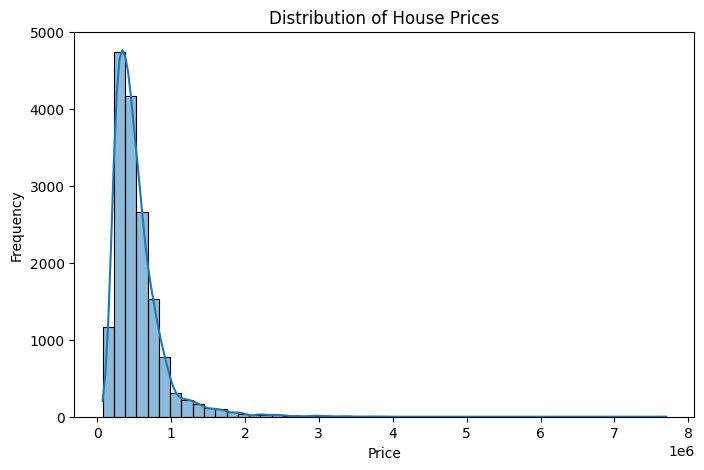

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(train["price"], bins=50, kde=True)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()


The histogram of house prices shows a strong right-skewed distribution, with most houses clustered at lower prices and a long tail of very expensive properties. Such skewed data can make regression models unstable and bias the learning process. To normalize the distribution and stabilize variance, we apply a log transformation to the target variable `price` before training the model.

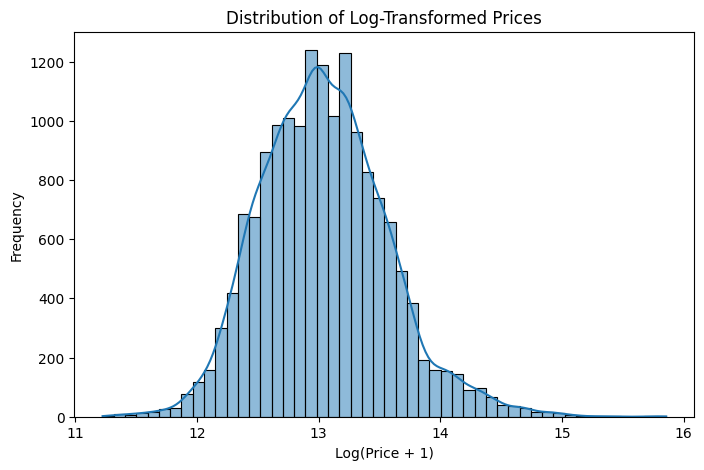

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

log_price = np.log1p(train["price"])

plt.figure(figsize=(8,5))
sns.histplot(log_price, bins=50, kde=True)
plt.xlabel("Log(Price + 1)")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Transformed Prices")
plt.show()

##### Price vs Living Area (sqft)


Text(0.5, 1.0, 'Price vs Living Area')

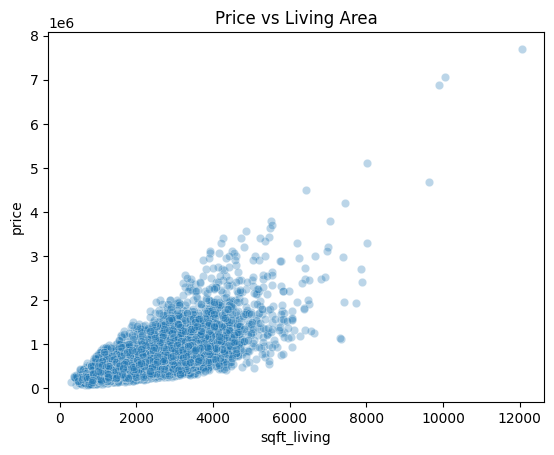

In [ ]:
sns.scatterplot(x=train["sqft_living"], y=train["price"], alpha=0.3)
plt.title("Price vs Living Area")

The scatter plot shows a clear positive relationship between living area (`sqft_living`) and house price. 
Homes with larger interior space tend to sell for significantly higher prices, although the relationship is 
not perfectly linear — higher‐end properties show more variability in price. There are also a few extreme 
outliers with very large square footage and very high prices. This confirms that `sqft_living` is one of the 
most important predictors in the dataset and supports including it prominently in the model.

##### Price Distribution Across Housing Grades

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '1'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, '11'),
  Text(10, 0, '12'),
  Text(11, 0, '13')])

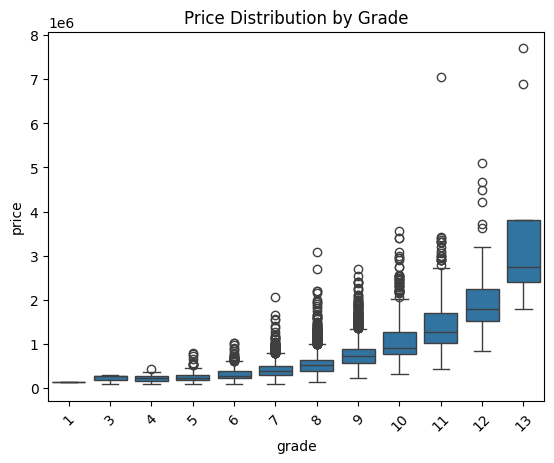

In [21]:
sns.boxplot(x=train["grade"], y=train["price"])
plt.title("Price Distribution by Grade")
plt.xticks(rotation=45)

The boxplot shows how house prices vary across different quality grades. There is a clear upward trend:
as the grade increases, both the median price and the spread of prices increase significantly. Lower‐grade
homes are tightly clustered at lower price levels, while higher‐grade homes show much wider variability and
include many high‐priced outliers. This indicates that the quality rating assigned to a house is strongly
linked to its market value and is an important feature for predicting price.

##### Impact of Waterfront View on House Prices

Text(0.5, 1.0, 'Waterfront Effect on Price')

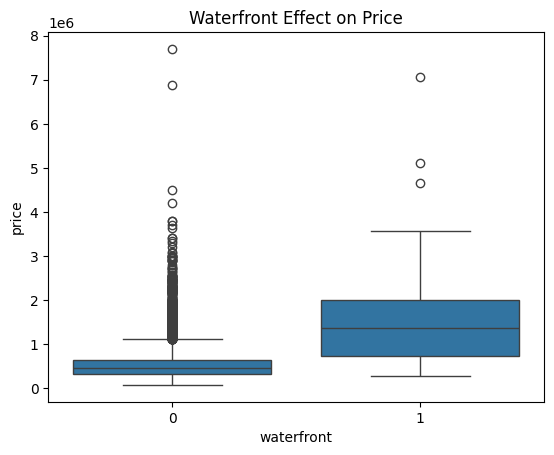

In [22]:
sns.boxplot(x=train["waterfront"], y=train["price"])
plt.title("Waterfront Effect on Price")

The boxplot compares the distribution of prices for homes with and without a waterfront view. Houses located
on the waterfront are substantially more expensive on average, with both higher medians and a much wider
range of high-end prices. In contrast, non-waterfront homes cluster at significantly lower price levels. 
This suggests that waterfront location adds a strong premium to property value and is a key driver in the dataset.

##### Outliers in Living Area (sqft_living)

Text(0.5, 1.0, 'Outliers in Living Area')

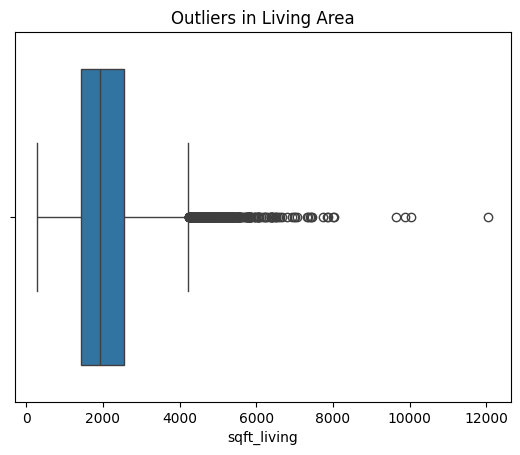

In [ ]:
sns.boxplot(x=train["sqft_living"])
plt.title("Outliers in Living Area")

The boxplot shows the distribution of the `sqft_living` feature and highlights the presence of several
extreme outliers on the upper end. Most houses fall within a relatively narrow range of floor space,
but a small number of very large luxury homes extend far beyond the typical values.

These outliers were not removed because they likely correspond to genuinely large properties rather than
data errors. Since high-end houses are an important part of the housing market, keeping them in the dataset
allows the model to learn how extremely large homes influence price, instead of ignoring those cases.

##### Outliers in House Prices

Text(0.5, 1.0, 'Price Outliers')

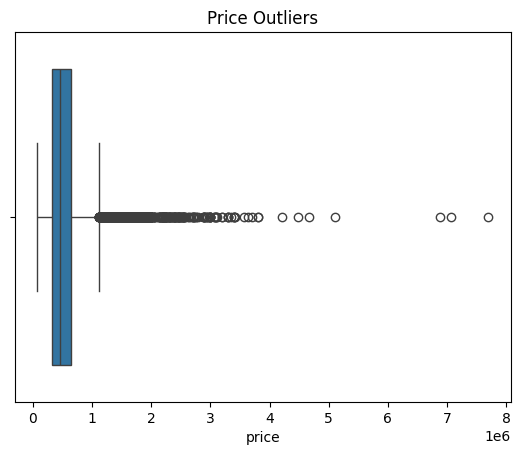

In [24]:
sns.boxplot(x=train["price"])
plt.title("Price Outliers")

The boxplot visualizes the distribution of house prices and reveals a substantial number of high-end
outliers. While most properties fall within a moderate price range, a small portion of luxury homes
extend far beyond the typical values, creating a long right tail in the distribution.

These outliers were intentionally not removed, since they likely represent legitimate luxury properties
rather than data mistakes. Removing them could bias the model toward average-priced homes and reduce
its ability to correctly estimate prices for expensive properties.

##### Average House Price Trend Over Time

Text(0.5, 1.0, 'Average Price Over Years')

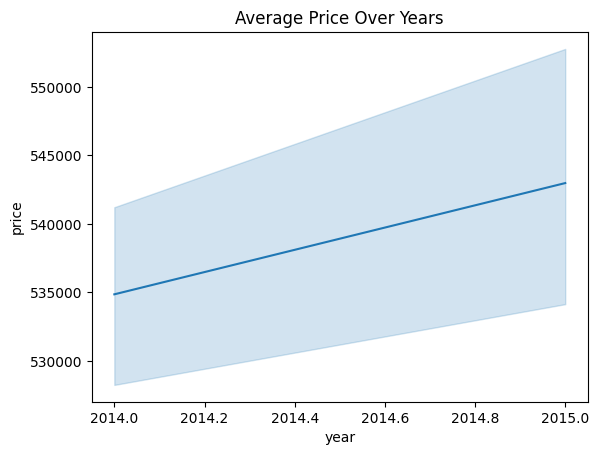

In [26]:
train["date"] = pd.to_datetime(train["date"])
train["year"] = train["date"].dt.year

sns.lineplot(x=train["year"], y=train["price"])
plt.title("Average Price Over Years")


The line plot shows the trend in average house prices over the available years. 
There is a clear upward movement, indicating that housing prices were gradually 
increasing over time. The shaded region represents the variation around the mean, 
showing that although individual prices fluctuate, the overall market trend is 
consistently rising. This suggests that time-related features (such as year or 
date of sale) can provide useful information for the model.

##### Distribution of Living Area (sqft_living)

Text(0.5, 1.0, 'Distribution of Living Area')

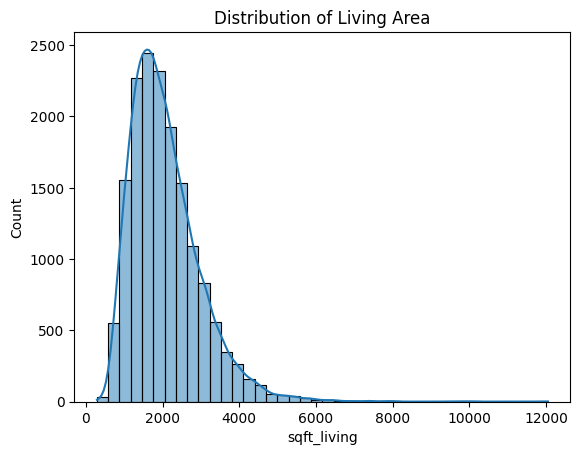

In [28]:
sns.histplot(train["sqft_living"], bins=40, kde=True)
plt.title("Distribution of Living Area")

The histogram shows that most houses fall within a moderate living area range, 
with the distribution heavily right-skewed due to a small number of very large homes. 
This skew suggests that transformations (such as log-scaling) may help models better 
capture patterns related to living space.

##### Price Comparison: Renovated vs Non-Renovated Homes

Text(0.5, 1.0, 'Price Difference: Renovated vs Not Renovated')

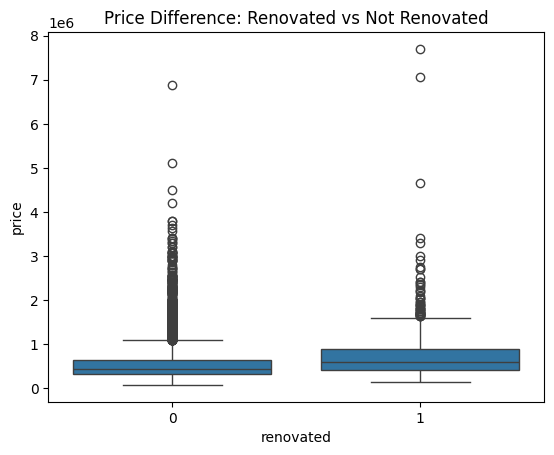

In [32]:
train["renovated"] = (train["yr_renovated"] > 0).astype(int)

sns.boxplot(x="renovated", y="price", data=train)
plt.title("Price Difference: Renovated vs Not Renovated")

The boxplot compares the prices of homes that have been renovated against those that have not. 
Renovated properties tend to have slightly higher median prices and a wider spread of values, 
indicating that renovation can add value but its effect varies depending on other factors such 
as size, location, and overall quality.


##### Price vs Year of Renovation

Text(0.5, 1.0, 'Price vs Year of Renovation')

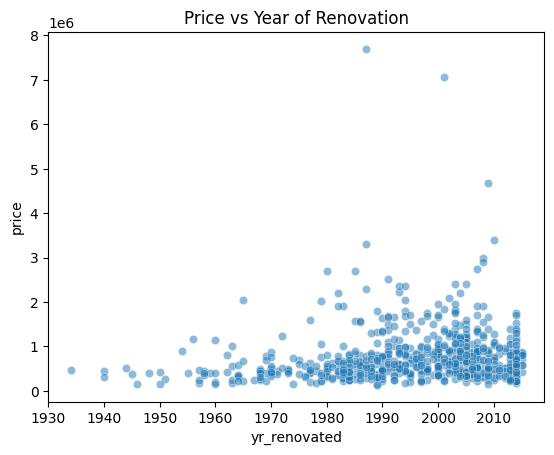

In [45]:
renovated = train[train["yr_renovated"] > 0]

sns.scatterplot(x=renovated["yr_renovated"], y=renovated["price"], alpha=0.5)
plt.title("Price vs Year of Renovation")

This scatter plot shows the relationship between renovation year and house price. 
More recently renovated homes tend to cluster at higher price levels, while older 
or never-renovated properties generally sell for less. However, the spread is wide, 
indicating that renovation year alone does not determine price but contributes as 
one of several price-influencing factors.

##### Price Variation Across Property Condition Levels

Text(0.5, 1.0, 'Price vs Condition')

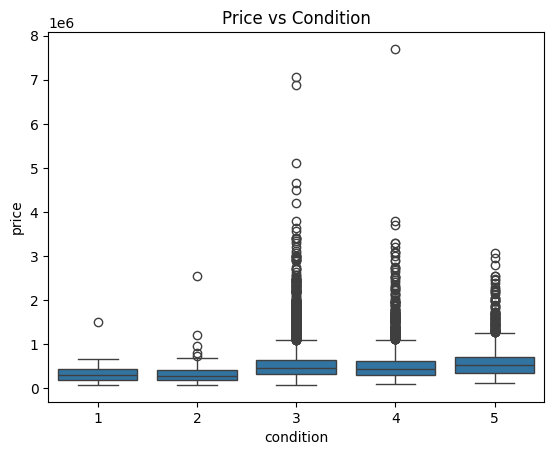

In [33]:
sns.boxplot(x="condition", y="price", data=train)
plt.title("Price vs Condition")

This boxplot compares house prices across different condition ratings. 
Although higher condition scores generally correspond to slightly higher 
prices, the overlap between categories is large. This suggests that while 
condition plays some role in pricing, it is less influential than other 
factors such as size, grade, or location.

##### Interaction Between Living Area and Grade on Price

Text(0.5, 1.0, 'Interaction: Size vs Grade on Price')

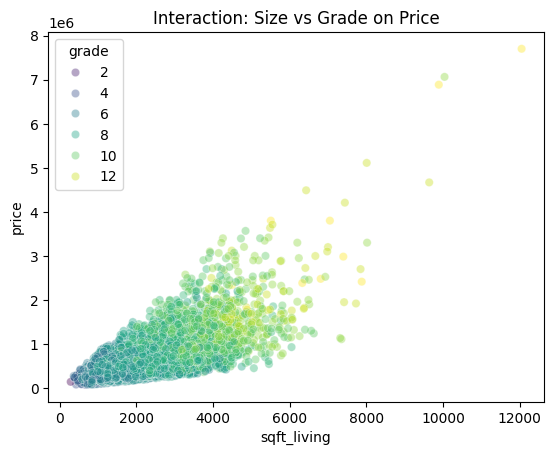

In [34]:
sns.scatterplot(
    x=train["sqft_living"],
    y=train["price"],
    hue=train["grade"],
    alpha=0.4,
    palette="viridis"
)
plt.title("Interaction: Size vs Grade on Price")


This scatter plot illustrates how house price is influenced jointly by living area 
and grade. Larger homes generally cost more, but the color shading shows that 
higher-grade houses are consistently priced above lower-grade houses even when 
their sizes are similar. This highlights an important interaction: both size and 
quality together drive price rather than either factor alone.

##### Price Distribution Across Different House Grades

Text(0.5, 1.02, 'Price Distribution by House Grade')

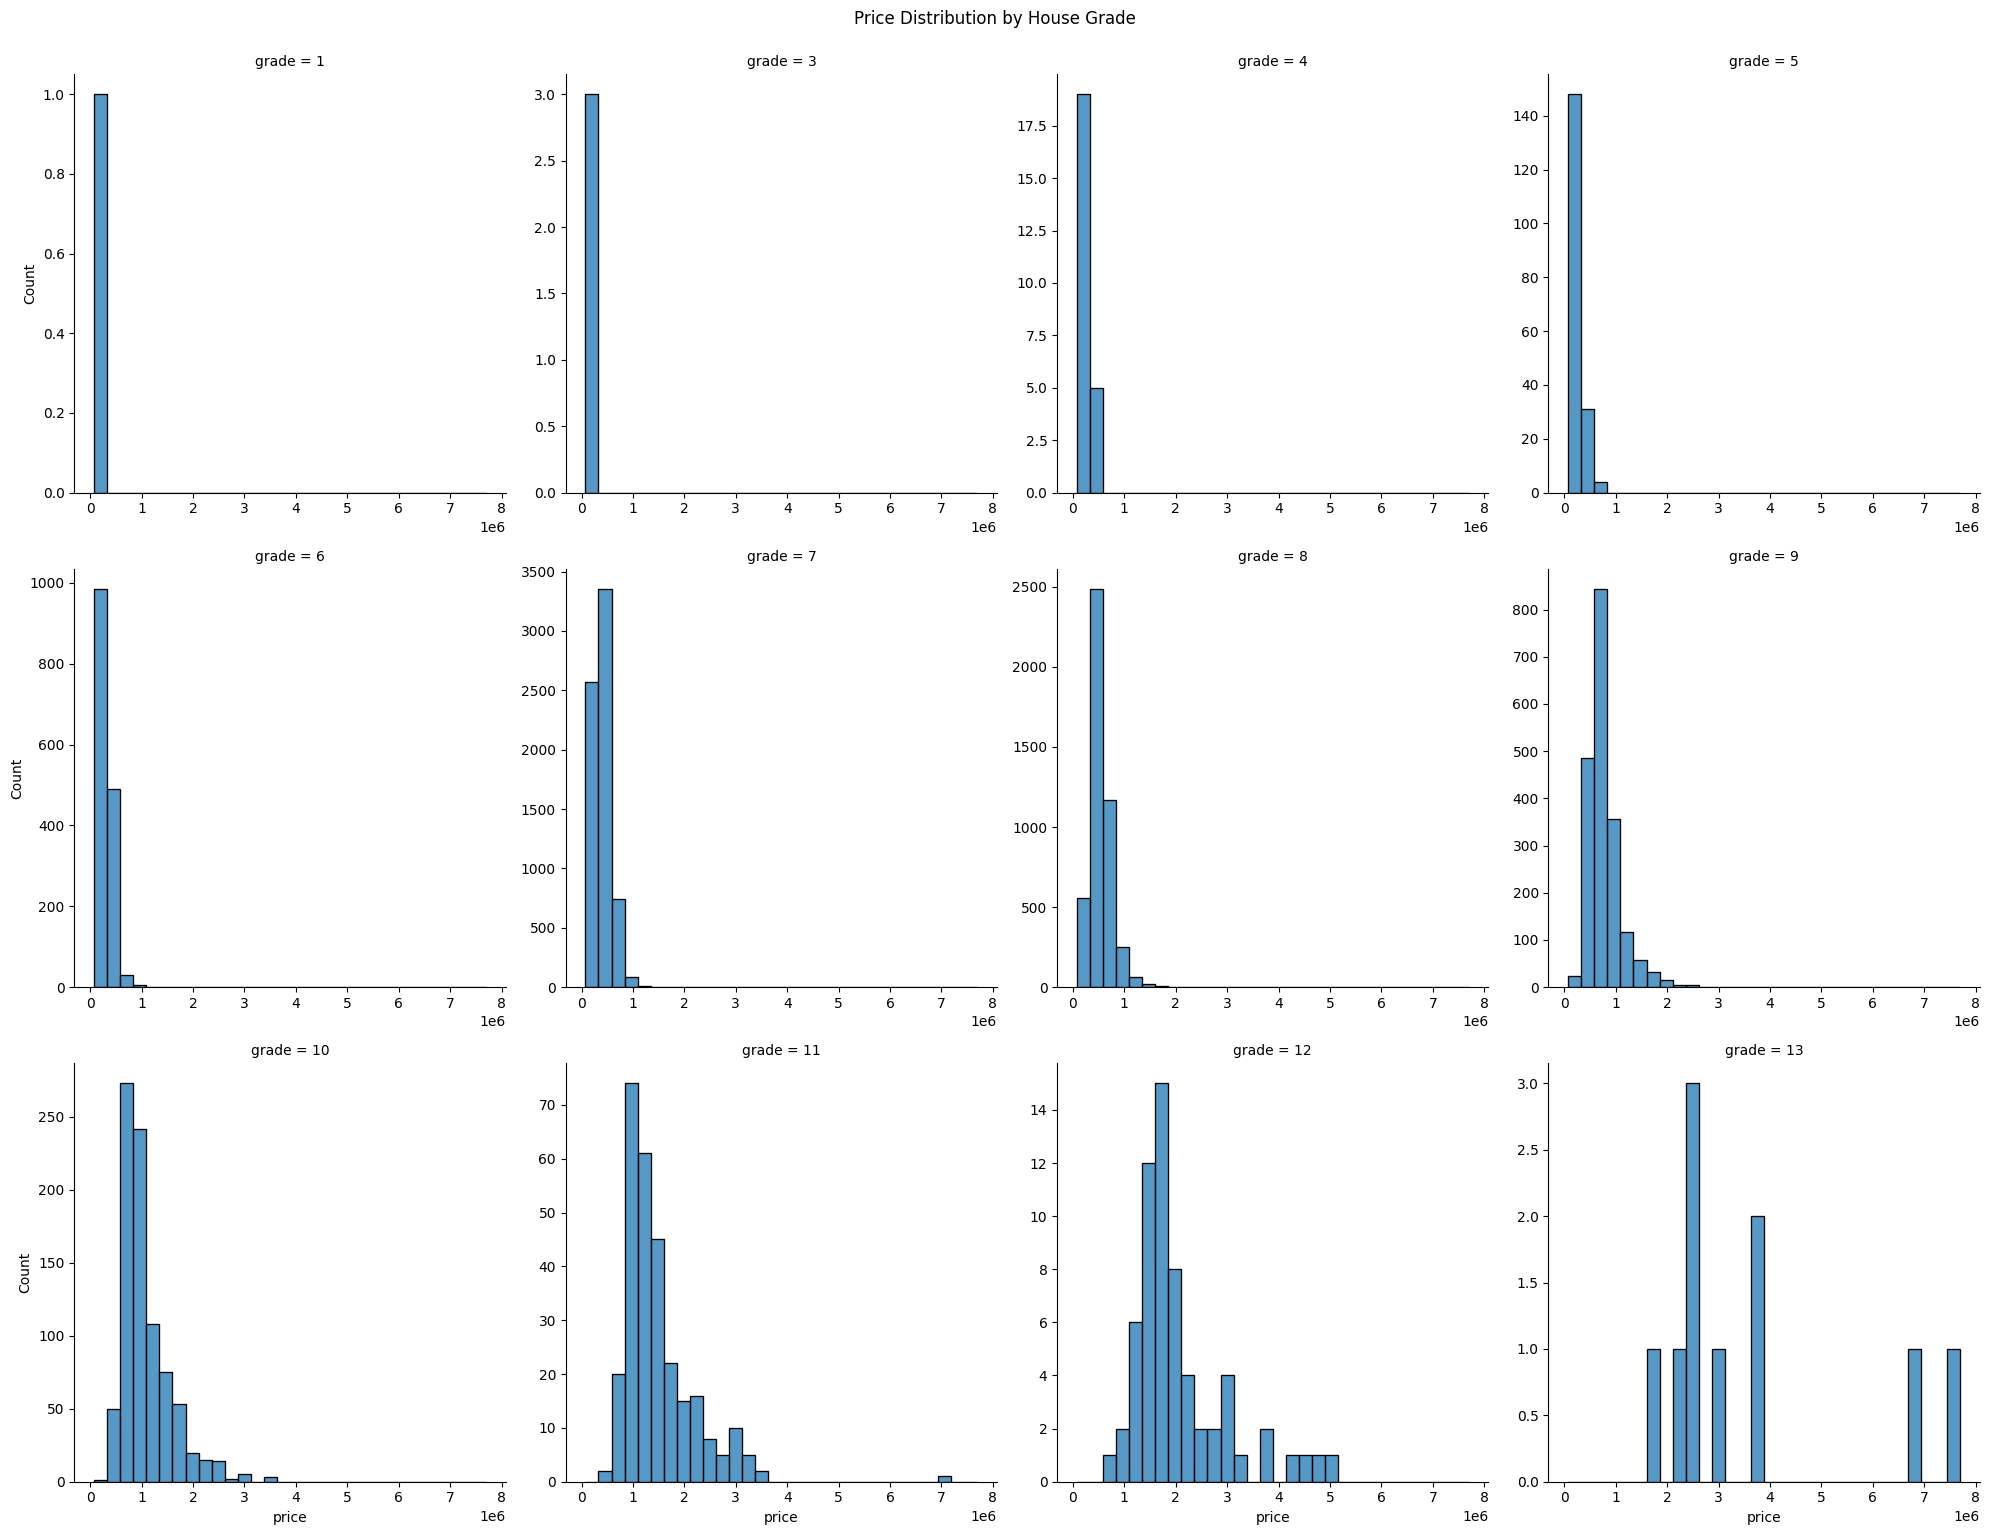

In [37]:
sns.displot(
    data=train,
    x="price",
    col="grade",
    col_wrap=4,
    bins=30,
    facet_kws={"sharex": False, "sharey": False}
)
plt.suptitle("Price Distribution by House Grade", y=1.02)

This grid of histograms shows how house prices are distributed within each 
grade category. Lower-grade homes are concentrated at the lower end of the 
price range, while higher-grade homes exhibit progressively higher price 
levels and wider spreads. The shift in distributions across grades confirms 
that the grading system strongly reflects overall property quality and is 
highly relevant for predicting price.

##### Price vs Year Built


Text(0.5, 1.0, 'Price vs Year Built')

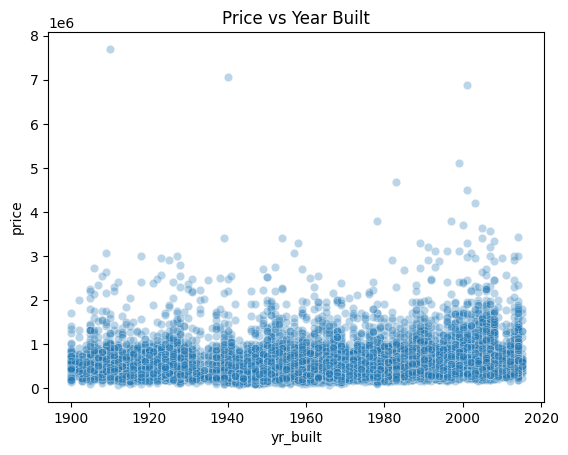

In [39]:
sns.scatterplot(x=train["yr_built"], y=train["price"], alpha=0.3)
plt.title("Price vs Year Built")

This scatter plot examines how house price varies with the year the property 
was originally built. Although newer homes tend to have slightly higher prices 
on average, the relationship is weak and highly scattered. This suggests that 
year built alone is not a strong predictor of price, and its influence is likely 
captured more meaningfully when combined with other features such as renovation 
status, size, or grade.


##### Bedrooms vs Bathrooms: Occupancy Pattern Heatmap


Text(0.5, 1.0, 'Bedrooms vs Bathrooms Heatmap')

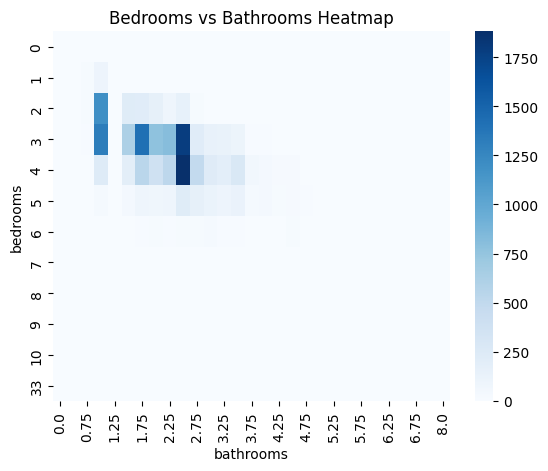

In [41]:
sns.heatmap(pd.crosstab(train["bedrooms"], train["bathrooms"]), cmap="Blues")
plt.title("Bedrooms vs Bathrooms Heatmap")

This heatmap shows how bedroom counts and bathroom counts typically co-occur 
in the dataset. Most homes cluster around 3–4 bedrooms and 1.5–2.5 bathrooms, 
indicating that these configurations are the most common. Very large or very 
small combinations are rare, which suggests strong structural norms in how 
houses are built and marketed.


##### Price vs Number of Floors

Text(0.5, 1.0, 'Price vs Number of Floors')

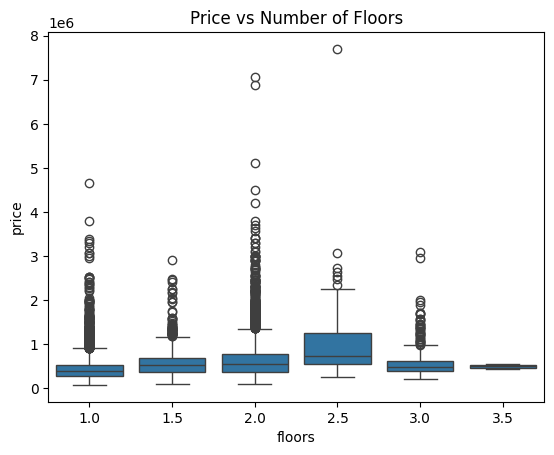

In [42]:
sns.boxplot(x="floors", y="price", data=train)
plt.title("Price vs Number of Floors")

This box plot compares home prices across different numbers of floors. 
Houses with 2 or more floors generally show higher median prices and 
greater price variability. However, the effect is not as strong as other 
features like grade or living area, suggesting that floor count contributes 
some value but is not a dominant price driver on its own.


##### Price Distribution by Zipcode

Text(0.5, 1.0, 'Price Distribution by Zipcode')

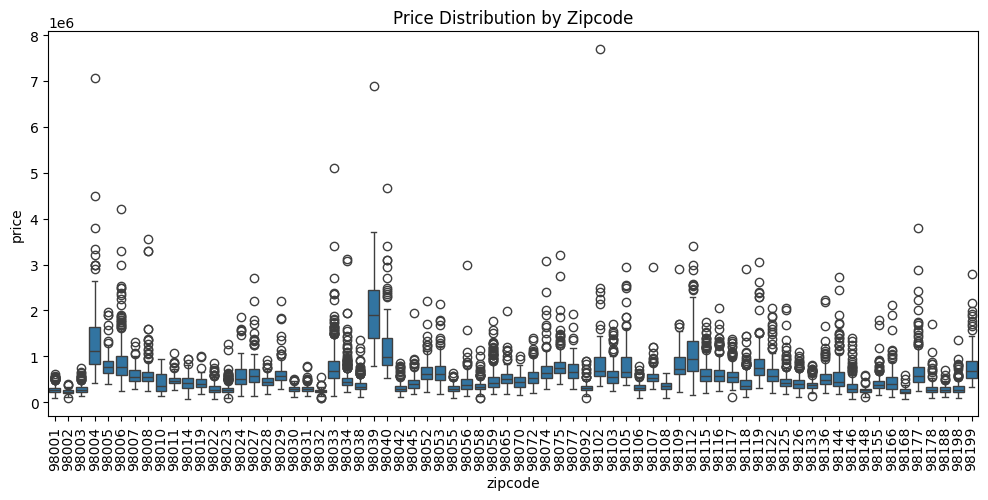

In [46]:
plt.figure(figsize=(12,5))
sns.boxplot(x=train["zipcode"], y=train["price"])
plt.xticks(rotation=90)
plt.title("Price Distribution by Zipcode")

This box plot shows how house prices vary across different zip codes.  
We observe large differences in median price between regions, and some 
zip codes contain significantly more high-value outliers than others.  

This indicates that **location is one of the strongest drivers of price**, 
capturing neighborhood demand, amenities, school quality, and proximity 
to urban centers. Including zipcode (or engineered geographic features) 
is therefore essential for modeling.


##### Bedroom Density vs Price

Text(0.5, 1.0, 'Bedroom Density vs Price')

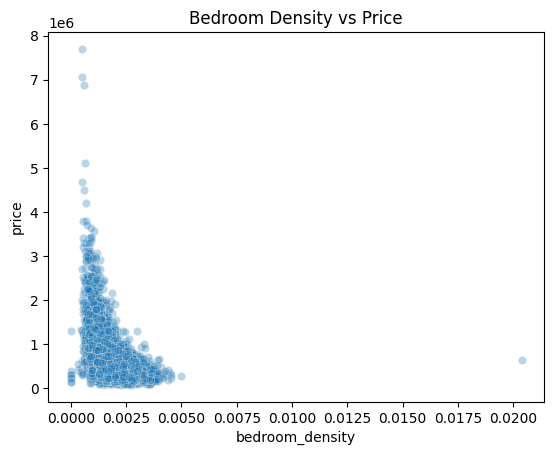

In [51]:
train["bedroom_density"] = train["bedrooms"] / train["sqft_living"]

sns.scatterplot(x=train["bedroom_density"], y=train["price"], alpha=0.3)
plt.title("Bedroom Density vs Price")

This plot shows the relationship between *bedroom density* (bedrooms per square foot) 
and house price. We see that properties with **very high bedroom density tend to be 
cheaper**, while more expensive homes usually have lower density — meaning more space 
per bedroom.

This suggests that buyers value **spacious layouts** more than simply the number 
of bedrooms, and cramped homes are penalized in price.


##### Density of Housing Locations

Text(0.5, 1.0, 'Density of Housing Locations')

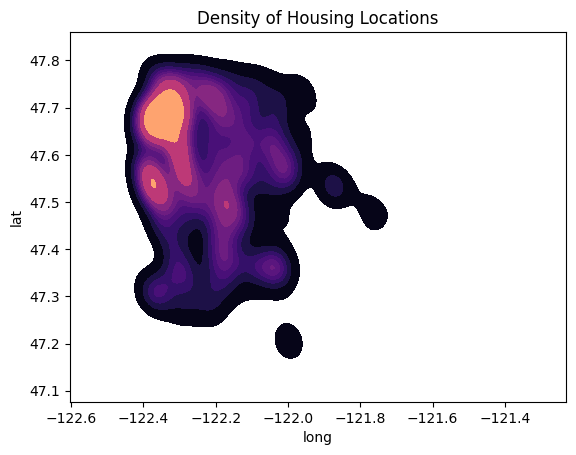

In [35]:
sns.kdeplot(
    x=train["long"],
    y=train["lat"],
    fill=True,
    cmap="magma"
)
plt.title("Density of Housing Locations")


This contour density plot shows where most homes in the dataset are located.  
Darker regions indicate areas with a higher concentration of listings, while 
lighter regions represent sparsely populated areas.

We observe strong clustering around specific longitude–latitude regions, 
suggesting urban centers or high-demand neighborhoods. This reinforces that 
**location patterns are highly non-uniform** and should be captured carefully 
in the model.


##### Geographic Distribution of House Prices

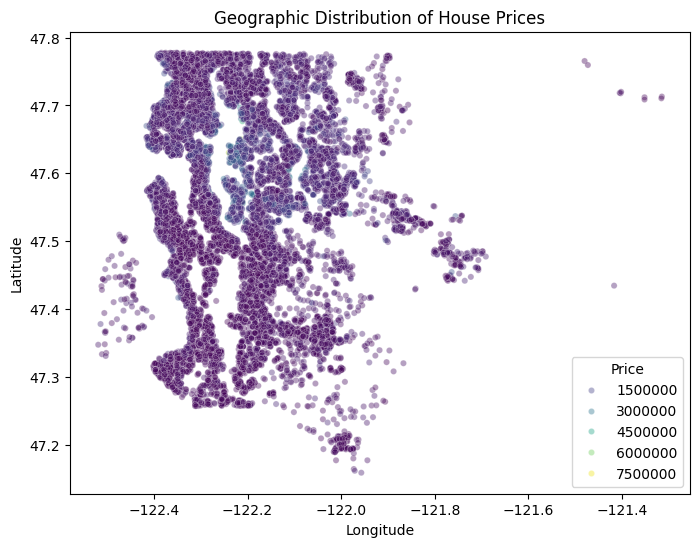

In [52]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=train["long"], 
    y=train["lat"], 
    hue=train["price"],
    palette="viridis",
    alpha=0.4,
    s=20
)
plt.title("Geographic Distribution of House Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Price", loc="best")
plt.show()


This scatter plot maps houses by latitude and longitude, with color indicating price.  
We see clusters of high-priced homes in specific locations, showing that geography has a strong influence on property value.


##### Price per Square Foot Across Locations

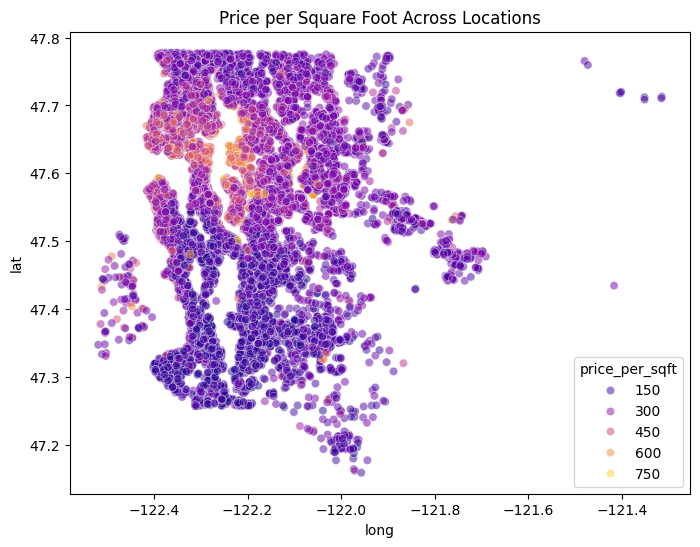

In [53]:
train["price_per_sqft"] = train["price"] / train["sqft_living"]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=train["long"], 
    y=train["lat"], 
    hue=train["price_per_sqft"],
    palette="plasma",
    alpha=0.5
)
plt.title("Price per Square Foot Across Locations")
plt.show()


This map colors each home by price per square foot.  
We observe pockets of significantly higher per-square-foot values, highlighting premium neighborhoods even when overall house sizes differ.


##### Train vs Test Location Coverage

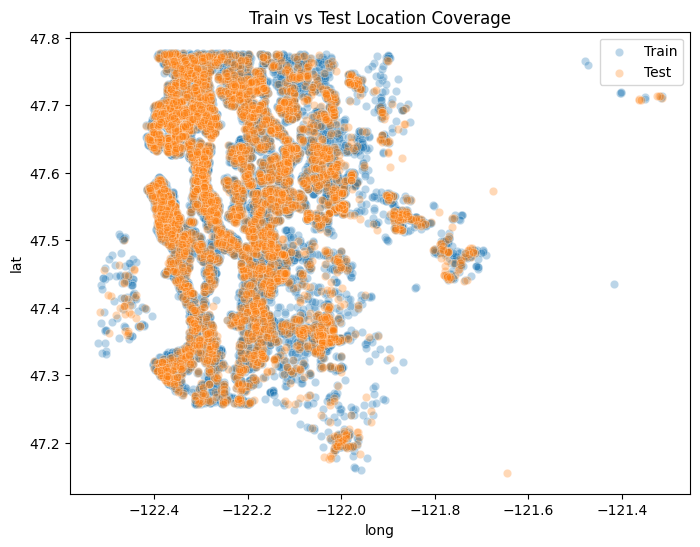

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train["long"], y=train["lat"], alpha=0.3, label="Train")
sns.scatterplot(x=test["long"],  y=test["lat"],  alpha=0.3, label="Test")
plt.title("Train vs Test Location Coverage")
plt.legend()
plt.show()


This scatter map compares the geographic spread of train and test data.  
Both sets cover very similar regions, suggesting the model will generalize well
without strong location bias between splits.


##### Geographic Clusters

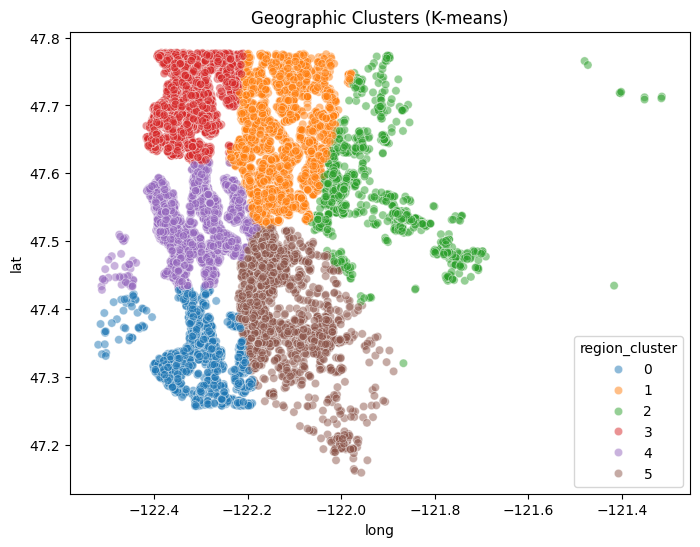

In [57]:
from sklearn.cluster import KMeans

coords = train[["lat", "long"]]
kmeans = KMeans(n_clusters=6, random_state=42)
train["region_cluster"] = kmeans.fit_predict(coords)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=train["long"], y=train["lat"],
    hue=train["region_cluster"],
    palette="tab10",
    alpha=0.5
)
plt.title("Geographic Clusters (K-means)")
plt.show()


K-means clustering groups properties into spatial regions based on latitude and longitude.  
These clusters capture neighborhood structure, which can be used as an additional feature 
to help the model learn location effects more smoothly.


##### Average Price by Region Cluster

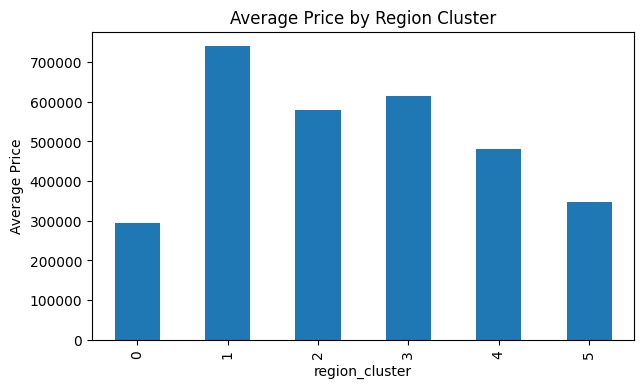

In [58]:
cluster_price = train.groupby("region_cluster")["price"].mean()

cluster_price.plot(kind="bar", figsize=(7,4))
plt.ylabel("Average Price")
plt.title("Average Price by Region Cluster")
plt.show()


This bar chart shows the average house price within each geographic cluster created by K-means.  
Clusters differ substantially in price, confirming that learned regions capture meaningful 
location-based value differences.


##### Smoothed Price Landscape

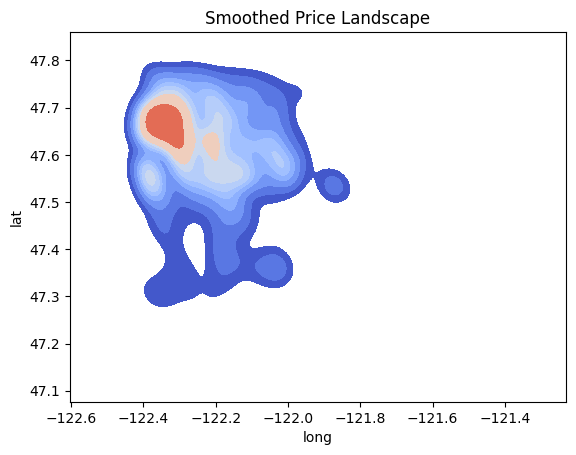

In [59]:
sns.kdeplot(
    x=train["long"], 
    y=train["lat"], 
    weights=train["price"],
    cmap="coolwarm",
    fill=True,
    thresh=0.1
)
plt.title("Smoothed Price Landscape")
plt.show()


This density heatmap smooths house prices across geography.  
Hotter (red/orange) zones correspond to consistently high-priced regions, clearly 
showing premium market pockets.


##### Renovated vs Non-Renovated Homes on the Map

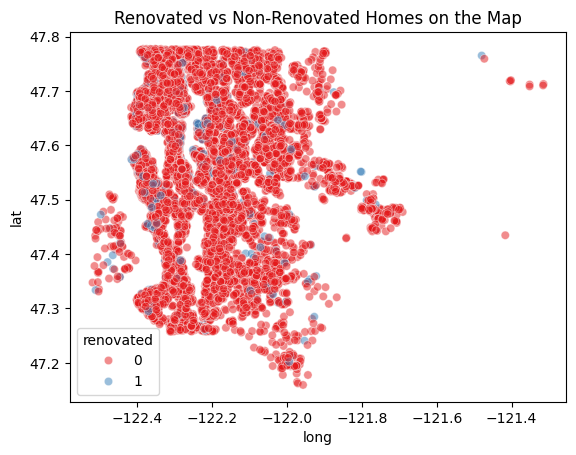

In [62]:
train["renovated"] = (train["yr_renovated"] > 0).astype(int)

sns.scatterplot(
    x=train["long"], y=train["lat"],
    hue=train["renovated"],
    palette="Set1",
    alpha=0.5
)
plt.title("Renovated vs Non-Renovated Homes on the Map")
plt.show()


This map highlights the locations of renovated and non-renovated properties.  
Renovated homes are scattered across many neighborhoods, suggesting renovation 
decisions are widespread rather than limited to a few areas.


#### Extracted Features from Images

In [67]:
train_fe.head()

0         1         2         3         4         5         6  \
0  0.063956  0.124507 -0.047171 -0.166595 -0.032263 -0.018367  0.014357   
1  0.217264  0.195637  0.228715 -0.185213 -0.056003 -0.091588 -0.103132   
2 -0.007968  0.151345  0.123488 -0.206935  0.110490 -0.148574 -0.065530   
3  0.266572  0.228906  0.065364 -0.201281 -0.052620 -0.100968 -0.010699   
4  0.045610  0.246433  0.159013 -0.160705 -0.100217 -0.017630 -0.020712   

          7         8         9        10        11        12        13  \
0  0.036748 -0.024116  0.015283 -0.106978  0.289802  0.001134  0.455672   
1  0.229704  0.004099  0.257945  0.059435  0.076585  0.529348  0.491587   
2  0.002444  0.125665  0.178986 -0.090475  0.264706  0.241118  0.192329   
3 -0.014176  0.122664  0.160546  0.049094  0.122709  0.074892  0.359637   
4  0.016349  0.016142  0.110430  0.289139 -0.034983  0.174632  0.623078   

         14        15        16        17        18        19        20  \
0 -0.203808  0.036978  0.172655  0.624942 -0.067523  0.025331  0.005649   
1 -0.109746 -0.005732  0.056238  0.271333  0.094637  0.045462  0.082843   
2 -0.211151 -0.052542 -0.055601  0.157098  0.186292  0.082028  0.003248   
3 -0.188939  0.017245  0.088580  0.422562 -0.105486  0.224342 -0.068134   
4 -0.103432 -0.005473 -0.013279  0.180903  0.281704  0.225921 -0.002330   

         21        22        23        24        25        26        27  \
0 -0.084409  0.026067  0.180492 -0.009635  0.298518 -0.036405  0.263066   
1  0.069704  0.169095  0.505605  0.061919  0.113344 -0.091888  0.129952   
2 -0.052225  0.044461  0.436064 -0.019449  0.317408 -0.084156  0.354303   
3  0.006773  0.050736  0.203881 -0.039367  0.101160 -0.098937  0.104913   
4 -0.024914 -0.086348  0.123899  0.337638  0.286907 -0.013654  0.537686   

         28        29        30        31        32        33        34  \
0 -0.137610  0.166340  0.055592  0.033315  0.109843 -0.115669 -0.155081   
1 -0.134528  0.218249  0.049082 -0.024820  0.014190  0.018013 -0.186991   
2 -0.139558  0.211350  0.183221  0.174989 -0.165921 -0.162688 -0.113176   
3 -0.125450 -0.075123  0.037495  0.088417  0.110291 -0.116297 -0.162424   
4 -0.195917  0.035066  0.228247 -0.067403  0.009194  0.185988 -0.216754   

         35        36        37        38        39        40        41  \
0 -0.155043  0.193020 -0.094010 -0.064613 -0.055162 -0.108901  0.007391   
1 -0.113098 -0.105403 -0.044298 -0.059314  0.043372 -0.038319  0.079492   
2 -0.033872 -0.081552 -0.047757  0.233019 -0.010243 -0.097908  0.063428   
3 -0.123382  0.119906 -0.091141 -0.008301 -0.071099 -0.119814  0.076504   
4  0.039267  0.028076 -0.029286  0.009018  0.273971 -0.160564  0.174841   

         42        43        44        45        46        47        48  \
0  0.153145  0.093321  0.036143 -0.215940 -0.150470 -0.174767 -0.019950   
1 -0.055168  0.097191 -0.036588 -0.038909 -0.168172 -0.176129 -0.029626   
2 -0.128869  0.164182 -0.127996 -0.206410 -0.158525 -0.119184 -0.050136   
3 -0.030246 -0.083978  0.027742 -0.194020 -0.118365 -0.141221 -0.071045   
4  0.224847  0.052109  0.133541 -0.185628 -0.079487 -0.067126 -0.064729   

         49        50        51        52        53        54        55  \
0 -0.079460  0.175726  0.109430 -0.136409 -0.138894 -0.123427  0.495825   
1  0.200081 -0.105997  0.093319 -0.145015  0.017968 -0.155591  0.161922   
2  0.399150  0.026031  0.000287 -0.132737 -0.219212 -0.172355 -0.020712   
3 -0.052871  0.224364  0.120227 -0.165367 -0.150810 -0.130689  0.308719   
4  0.021775  0.068263  0.431445 -0.175410 -0.082912 -0.100684  0.406331   

         56        57        58        59        60        61        62  \
0 -0.036119 -0.137738 -0.133596 -0.011443  0.043321  0.583291  0.022629   
1 -0.114235 -0.050756 -0.117004  0.189430  0.055554  0.049690  0.056450   
2 -0.088507 -0.045932 -0.090949 -0.050391  0.003843 -0.089360 -0.087489   
3 -0.066387 -0.081512 -0.089797  0.107244  0.080173  0.157230  0.070424   
4  0.044127 -0.114218 -0.12

In [68]:
test_fe.head()

0         1         2         3         4         5         6  \
0  0.010346  0.005331  0.367353 -0.140115 -0.199248 -0.103202 -0.202781   
1  0.160740  0.130965  0.056553 -0.203302 -0.073600 -0.045328 -0.027404   
2  0.035918  0.060613  0.247986 -0.207725 -0.074980  0.001754 -0.118750   
3  0.081681  0.012733  0.140057 -0.151011  0.244626 -0.054242 -0.123129   
4  0.378296  0.039196  0.144753 -0.197420  0.108042 -0.129783 -0.103169   

          7         8         9        10        11        12        13  \
0 -0.129967 -0.135987 -0.080807  0.010002 -0.151535  0.345759  0.296907   
1 -0.027186  0.054868  0.089104  0.067599  0.401469  0.101451  0.367482   
2  0.031558 -0.015354 -0.038582  0.146847  0.137967  0.285174  0.213190   
3 -0.093152  0.054039  0.191476  0.089129  0.417868  0.169512  0.360283   
4 -0.039115 -0.043385 -0.060987  0.024565  0.303404  0.052877  0.369634   

         14        15        16        17        18        19        20  \
0 -0.138846 -0.050564  0.071412  0.279836 -0.074339  0.066311 -0.078529   
1 -0.197891  0.211779  0.032043  0.467497  0.122299  0.242063 -0.000118   
2 -0.130039 -0.021096  0.053958  0.612992  0.043125  0.226830 -0.077595   
3 -0.137505 -0.007266 -0.111527  0.205770  0.063748  0.031566 -0.094515   
4 -0.181077  0.172734  0.092672  0.145595  0.010716  0.115147  0.191678   

         21        22        23        24        25        26        27  \
0 -0.014790 -0.155048  0.186875  0.300588 -0.042918  0.078486  0.817880   
1 -0.023875 -0.070239  0.075477  0.087348  0.237846 -0.099342  0.377431   
2  0.006896 -0.000960  0.424788  0.223940 -0.064690 -0.125333  0.399407   
3  0.055212 -0.022102  0.527215  0.052323  0.043896 -0.172327  0.087751   
4  0.063993  0.082855  0.103728 -0.078440 -0.067814 -0.240384  0.074587   

         28        29        30        31        32        33        34  \
0 -0.064275  0.356032  0.197446  0.098995 -0.045585 -0.090680 -0.209351   
1 -0.101249 -0.029154  0.084653  0.048629  0.053773 -0.049806 -0.141718   
2 -0.175848  0.206288  0.368301  0.036142 -0.031554  0.005716 -0.149765   
3 -0.107139  0.177221  0.035475  0.156092  0.019574 -0.044237 -0.123515   
4 -0.041551 -0.015170  0.003778  0.115737  0.003607 -0.136617 -0.081595   

         35        36        37        38        39        40        41  \
0 -0.030495 -0.050637 -0.199064 -0.059993 -0.157224 -0.054034  0.093296   
1 -0.127673  0.062541 -0.069140  0.068786 -0.174179 -0.168787 -0.106903   
2  0.015640 -0.067841 -0.104341  0.021018 -0.126098 -0.079144 -0.114056   
3  0.003653  0.166402 -0.066563  0.132039 -0.111672 -0.009533 -0.045423   
4 -0.054783 -0.075878 -0.117101 -0.002842 -0.130969 -0.057274 -0.189947   

         42        43        44        45        46        47        48  \
0 -0.071905 -0.024482  0.021220 -0.191655 -0.220801 -0.167139  0.014335   
1 -0.031120  0.040935 -0.046452 -0.216427 -0.155940 -0.140700 -0.085832   
2 -0.147572  0.162034  0.003985 -0.212800 -0.075603 -0.104755 -0.080669   
3 -0.145877  0.071592 -0.064584 -0.153369 -0.039412 -0.117035 -0.025061   
4 -0.029112 -0.034794 -0.143494 -0.170810 -0.129026 -0.173608 -0.094462   

         49        50        51        52        53        54        55  \
0  0.481256 -0.125604  0.278982 -0.132721 -0.141219 -0.157702  0.137879   
1  0.065009  0.258178  0.151962 -0.141244 -0.154307 -0.128152  0.521443   
2  0.073572 -0.045189  0.154054 -0.166202  0.026962 -0.173052  0.281182   
3  0.238714 -0.047451  0.198707 -0.085287 -0.072947 -0.125885  0.313465   
4  0.067737  0.061523  0.044834 -0.184439 -0.131069 -0.111818  0.361240   

         56        57        58        59        60        61        62  \
0 -0.147186 -0.090134 -0.176080 -0.014243 -0.040454 -0.037048 -0.145772   
1  0.049558 -0.092335 -0.143471  0.146734 -0.002657  0.168502  0.115049   
2 -0.112020 -0.162819 -0.144893  0.037266 -0.028988  0.198566 -0.011268   
3 -0.015319  0.017221 -0.222177  0.089339 -0.024810 -0.001949 -0.021582   
4 -0.016193 -0.204739 -0.02

The extracted image/derived features contained a very large number of columns, 
many of which were highly correlated or contributed very little unique information.  
Training models directly on such high-dimensional data can lead to:

- slower training,
- higher memory usage, and
- increased risk of overfitting.

To address this, we applied **Principal Component Analysis (PCA)** to the extracted 
feature matrix in the modelling notebook. PCA transforms the original features 
into a smaller set of *principal components* that retain most of the total variance 
(information) in the data while removing redundancy.


#### Advantages of PCA
- **Dimensionality Reduction** – compresses hundreds/thousands of features into a manageable number.
- **Removes Multicollinearity** – principal components are uncorrelated, helping tree and linear models.
- **Prevents Overfitting** – reduces noise and redundant information.
- **Faster Training & Prediction** – fewer features mean more efficient computation.
- **Improves Model Stability** – reduces sensitivity to irrelevant variables.
